# Stage 2: Exploratory Data Analysis

## 1. Merging Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [3]:
customers = pd.read_csv("Dataset - Cleaned/customers.csv")
locations = pd.read_csv("Dataset - Cleaned/locations.csv", low_memory=False)
order_items = pd.read_csv("Dataset - Cleaned/order_items.csv")
order_payments = pd.read_csv("Dataset - Cleaned/order_payments.csv")
order_reviews = pd.read_csv("Dataset - Cleaned/order_reviews.csv")
orders = pd.read_csv("Dataset - Cleaned/orders.csv")
products = pd.read_csv("Dataset - Cleaned/products.csv")
sellers = pd.read_csv("Dataset - Cleaned/sellers.csv")
category_translation = pd.read_csv("Dataset - Original/product_category_name_translation.csv")

In [4]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [5]:
locations.head(3)

,geolocation_zip_code_prefix,latitude,longitude,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [6]:
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19/09/2017 09:45,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03/05/2017 11:05,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18/01/2018 14:48,199.0,17.87


In [7]:
order_payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [8]:
order_reviews.head(3)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:24


In [9]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [10]:
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [11]:
sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [12]:
category_translation.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


### What to merge:

1. orders with order_payments, order_reviews, order_items. on = order_id
2. customers with locations, left on = customer_zip_code_prefix and right on = geolocation_zip_code_prefix
3. products with category_translation, on = product_category_name

In [13]:
orders_merged = orders.merge(order_payments, on="order_id").merge(order_items, on="order_id").merge(order_reviews, on="order_id")
orders_merged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,06/10/2017 11:07,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,06/10/2017 11:07,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,06/10/2017 11:07,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,30/07/2018 03:24,118.70,22.76,8d5266042046a06655c8db133d120ba5,4,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,13/08/2018 08:55,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18,2018-08-22 19:07:58


In [14]:
len(orders_merged)

114842

In [15]:
len(orders)

96461

In [16]:
orders_merged.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
dtype: int64

In [17]:
customers_merged = customers.merge(locations, left_on="customer_zip_code_prefix", right_on = "geolocation_zip_code_prefix")
customers_merged.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,latitude,longitude,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509898,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.515413,-47.398194,franca,SP


In [18]:
customers_merged.isna().sum()

customer_id                    0
customer_unique_id             0
customer_zip_code_prefix       0
customer_city                  0
customer_state                 0
geolocation_zip_code_prefix    0
latitude                       0
longitude                      0
geolocation_city               0
geolocation_state              0
dtype: int64

In [19]:
customers_merged.drop(["customer_zip_code_prefix", "geolocation_zip_code_prefix", "customer_city", "customer_city"], axis=1, inplace=True)
customers_merged.rename(columns={
    "geolocation_city": "city",
    "geolocation_state": "state"
}, inplace=True)
customers_merged.columns

Index(['customer_id', 'customer_unique_id', 'customer_state', 'latitude',
       'longitude', 'city', 'state'],
      dtype='object')

In [20]:
products_merged = products.merge(category_translation, on="product_category_name")
products_merged.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [21]:
products_merged.drop(columns=["product_category_name"], inplace=True)
products_merged.rename(columns={"product_category_name_english": "product_category_name"}, inplace=True)

### Available Dataframes:

1. products_merged: has products info
2. customers_merged: has customers info
3. orders_merged: has orders info [star schema's center]
4. sellers: has sellers info

Dataframes are only merged for EDA

In [22]:
print(products_merged.columns)
print(orders_merged.columns)
print(customers_merged.columns)
print(sellers.columns)

Index(['product_id', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'product_category_name'],
      dtype='object')
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'review_id',
       'review_score', 'review_creation_date', 'review_answer_timestamp'],
      dtype='object')
Index(['customer_id', 'customer_unique_id', 'customer_state', 'latitude',
       'longitude', 'city', 'state'],
      dtype='object')
Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')


## 2. Exploratory Data Analysis

In [23]:
print(orders_merged['customer_id'].nunique(), customers_merged['customer_id'].nunique())
print(orders_merged['seller_id'].nunique(), sellers['seller_id'].nunique())
print(orders_merged['product_id'].nunique(), products_merged['product_id'].nunique())


95814 75317
2965 3095
32066 32328


In [24]:
total_revenue = orders_merged['payment_value'].sum()
avg_order_value = orders_merged['payment_value'].mean()
total_customers = orders_merged['customer_id'].nunique()

print(f"Total Revenue: {total_revenue:,.2f}")
print(f"Average Order Value: {avg_order_value:,.2f}")
print(f"Unique Customers: {total_customers}")

Total Revenue: 19,667,510.68
Average Order Value: 171.26
Unique Customers: 95814


C:\Users\Mohamed\AppData\Local\Temp\ipykernel_12688\2305945585.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(orders_by_month.index, rotation=45)
C:\Users\Mohamed\AppData\Local\Temp\ipykernel_12688\2305945585.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(revenue_by_month.index, rotation=45)


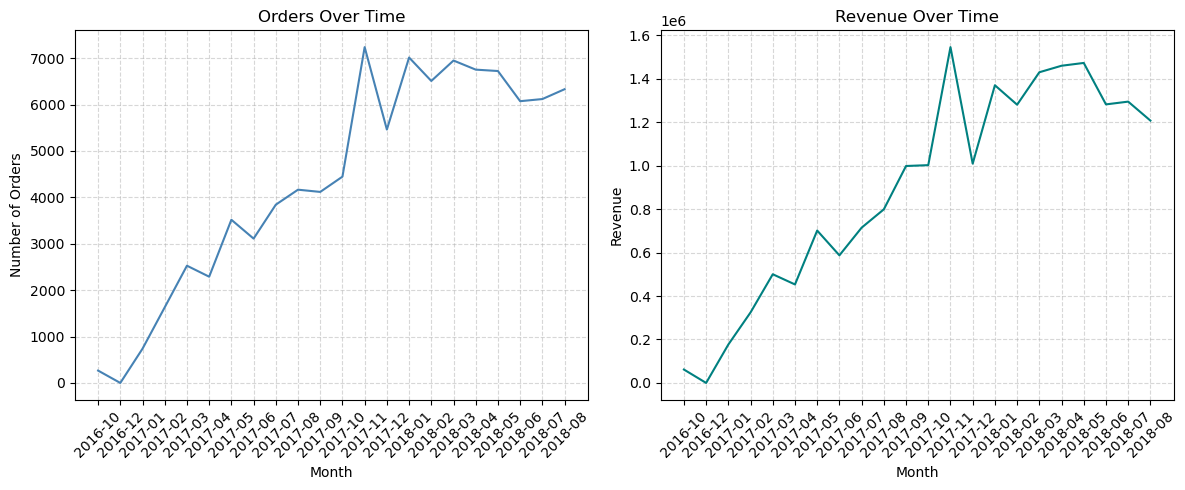

In [25]:
orders_merged['order_purchase_timestamp'] = pd.to_datetime(orders_merged['order_purchase_timestamp'])
orders_merged['month'] = orders_merged['order_purchase_timestamp'].dt.to_period('M')
orders_by_month = orders_merged.groupby('month')['order_id'].nunique()
revenue_by_month = orders_merged.groupby('month')['payment_value'].sum()

orders_by_month.index = orders_by_month.index.astype(str)
revenue_by_month.index = revenue_by_month.index.astype(str)


fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(orders_by_month, color='steelblue')
ax[0].set_title('Orders Over Time')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Number of Orders')
ax[0].set_xticklabels(orders_by_month.index, rotation=45)
ax[0].grid(True, linestyle='--', alpha=0.5)

ax[1].plot(revenue_by_month, color='teal')
ax[1].set_title('Revenue Over Time')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Revenue')
ax[1].set_xticklabels(revenue_by_month.index, rotation=45)
ax[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_12688\781287401.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


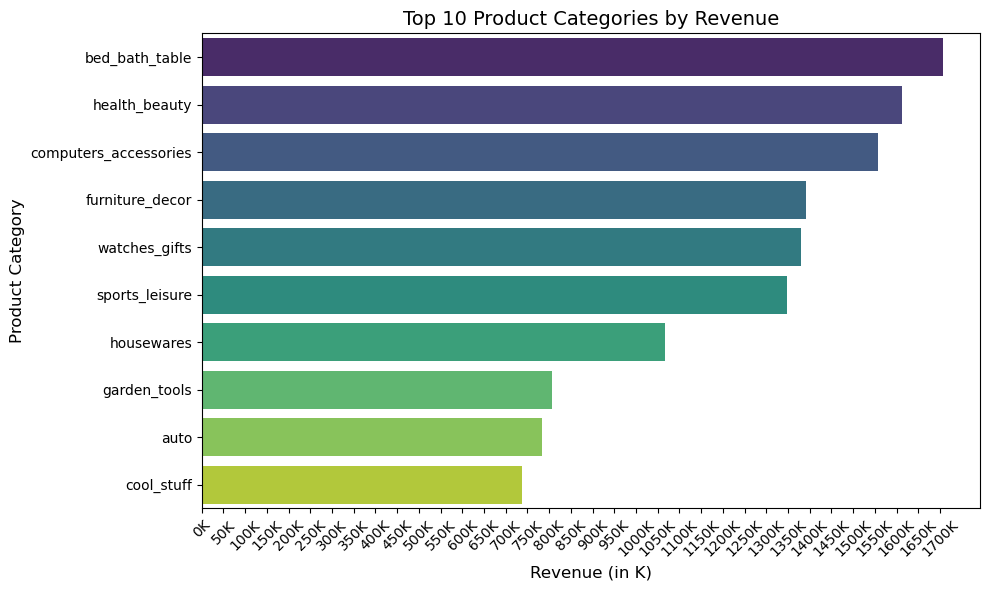

In [27]:
top_categories = (
    orders_merged.merge(products_merged[['product_id','product_category_name']], on='product_id').groupby('product_category_name')['payment_value'].sum()
    .sort_values(ascending=False).head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Product Categories by Revenue', fontsize=14)
plt.xlabel('Revenue (in K)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)

plt.xticks(
    ticks=np.arange(0, top_categories.values.max()+1, 50000),
    labels=[f'{int(x/1000)}K' for x in np.arange(0, top_categories.values.max()+1, 50000)],
    rotation=45
)

plt.tight_layout()
plt.show()
